-------------------------------------------------------
# **Question 6: MONTE CARLO $\pi$ (6 points)**
-------------------------------------------------------

## Description

It is possible to approximate the value of $\pi$ using Monte Carlo simulation. 

The idea is to first create a square with side 1 and a circle with radius 0.5 enclosed in this square. Let the circle have radius $r$ and be centered at $(0,0)$. Then the area of the circle is equal to $\pi r^2.$ The area of the square is equal to $4 r^2.$

From these two equations for the areas of a circle and square we can compute $\pi$. First, we need to find the ratio $R$ of the area of a circle to that of the square containing that circle:

$$R =\frac{\pi r^2}{4 r^2} = \frac{\pi}{4}.$$

Then to compute $\pi$ all we need to do is multiply 4 times $R.$ Just like with the integration example discussed in the lecture, we can approximate $R$ by simulating a large number of points in the square and then simply counting the number that fall inside the circle:

$$R \approx \frac{\text{Number of points within the circle}}{\text{Total number of points}}.$$

<center>

<img src="Monte_Carlo_pi.png" width="450px"> 

</center>

## Questions

a. Write a function to approximate $\pi$ using Monte Carlo simulation. 
Note: The function should generate data points based on a continuous uniform distribution within the square with side 1, centered at (0,0) (2 points). 

b. Use 1000 points. Print out the approximation of $\pi$. Make a scatter plot showing the generated points. (2 Points).

c. Print out the approximation based on 10,000 points. (2 Points)

## Code

### Part a

In [1]:
# create a function to approximate pi 

#your code here 
import numpy as np
import matplotlib.pyplot as plt


def approximate_pi(n):

    np.random.seed(42)

    x = np.random.uniform(-0.5, 0.5, n)
    y = np.random.uniform(-0.5, 0.5, n)

    in_circle =  x ** 2 + y ** 2 <= 0.25

    pi = 4 * (np.sum(in_circle) / n)

    return pi, x, y, in_circle

### Part b

In [ ]:
# plot 1000 points and PRINT the approximation of pi, make scatter plot

#your code here
pi, x, y, in_circle = approximate_pi(1000)

plt.figure(figsize=(6, 6))
plt.scatter(x[in_circle], y[in_circle], c='coolwarm', s=7, label='Inside')
plt.scatter(x[~in_circle], y[~in_circle], c='blue', s=7, label='Outside')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

: 

### Part c 

In [35]:
# Print approximation

#your code here
print("Approximation of pi: ", pi)

Approximation of pi:  3.096


-------------------------------------------------------
# **Question 7: ACCEPT/REJECT (8 points)**
-------------------------------------------------------

## Description

We are going to use accept/reject method to simulate random variables with the following PDF:

$$f(x) = \begin{cases}
4/3x & \text{ if } 0 < x \leq 0.5,\\
2/3 & \text{ if } 0.5 < x \leq 1.5,\\
8/3 - 4/3x & \text{ if } 1.5 < x \leq 2,\\
0 & \text{ otherwise.}
\end{cases}$$

## Questions 

a. Plot function $f$. (2 points)

b. Chose appropriate function $g(x)$ and constant $k$. (2 points)

c. Implement the accept/reject method and use it to generate 100,000 observations. (3 points)

d. Plot the sampled distribution together with function $f$. (1 point)

## Code

### Part a

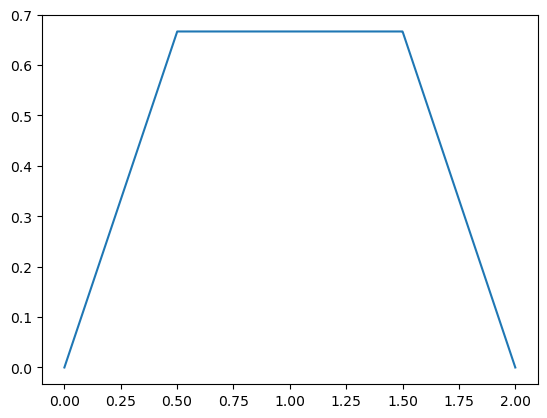

In [51]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


def f(x):

    if 0 < x <= 0.5:
        return 4/3 * x
    elif 0.5 < x <= 1.5:
        return 2/3
    elif 1.5 < x <= 2:
        return 8/3 - 4/3*x
    else:
        return 0


x = np.linspace(0, 2, 1000)
plt.plot(x, y)


### Part b

your solution here 

In [78]:
def g(x):
    return 0.5 * np.ones_like(x)

### Part c

In [79]:
# Your code
def accept_reject(n):
    observations = []
    while len(observations) < n:
        u = np.random.uniform(0, 1)
        x = np.random.uniform(0, 2)
        if f(x)/(k*g(x)) >= u:
            observations.append(x)

    return np.array(observations)
# define k 
k = 2
#define f(x) (defined)

#run the accept-reject algorithm 
n_observations = 100000
observations = accept_reject(n_observations)
#generate observations 

### Part d

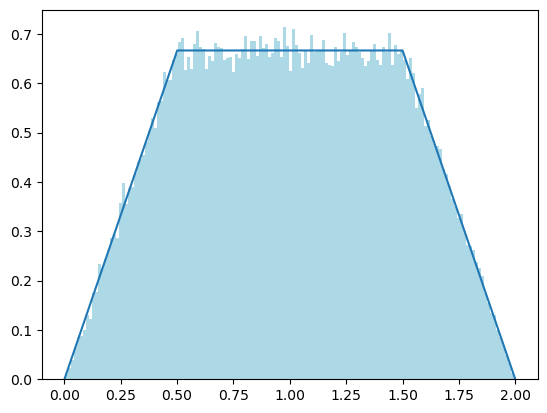

In [87]:
# Your code
plt.hist(observations,density=True, bins=150, color='lightblue')
plt.plot(x, y)
